# Download and install Kismet DE

## Intro to Kismet Development Edition


If you have been in the wifi community any length of time, you’ve probably heard of Kismet.  This tool has been around as long as most of us have been doing wifi.  Kismet is written by Mike Kershaw (dragorn) and is still in active development today.

The version of Kismet you are probably familiar with probably looks something like this:

![alt text](https://s3.amazonaws.com/cp-s3/wp-content/uploads/2011/04/08112142/kis.jpg "Kismet Classic")



While this version of Kismet is very mature, stable and functional, it isn’t very pretty.  And getting data out of it isn’t very fun.  We want something that looks more like this:

![alt text](https://www.kismetwireless.net/screenshot/webui-main.png "Kismet Development Edition")


So what are we going to do in this lab?
2. Install kismet
3. Build the KisemetRest python module
4. Pulling data collected by Kismet in python.


# Run the following cell.  Do not run anything beyond this cell


In [ ]:
!mkdir ~/kismet
!git clone https://www.kismetwireless.net/git/kismet.git ~/kismet/
!ls ~/kismet/
!sudo apt-get install build-essential git libmicrohttpd-dev \
            zlib1g-dev libnl-3-dev libnl-genl-3-dev libcap-dev \
            libpcap-dev libncurses5-dev libnm-dev libdw-dev \
            libsqlite3-dev
!cd ~/kismet && ./configure
!cd ~/kismet && make -j4
!cd ~/kismet && sudo make suidinstall
!sudo cp ~/wlpc_code/manuf /etc/manuf
!sudo usermod -a -G kismet pyfi

# Reboot the NUC

Run the following cell to reboot your NUC

In [ ]:
!sudo init 6

# Once the reboot complete

1 . log back in

2 . activate wlpc_env virtual environment

`workon wlpc_env`

3 . launch jupyter

`jupyter notebook --ip X.X.X.X &`

4 . Open Jupyter Notebook and return to the SSH Session

5 . Start Kismet
'sudo kismet -c wlp2s0'

6 . Return to Jupyter and Continue.

In [ ]:
#Installing dependancies for Kismet and plotting
!pip install requests matplotlib pandas scipy seaborn

Now let's get the password for Kismet:


In [ ]:
!cat ~/.kismet/kismet_httpd.conf | grep pass

4 . Now browse to the NUC on port 2501 in a new browser window

   http://x.x.x.x:2501
   
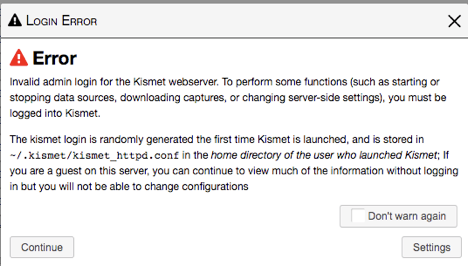


5 . Click Settings and replace the password with the one you copied from the last output

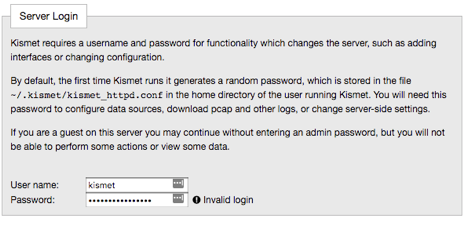



6 . Once the password field show a checkmark instead of an exclamation mark, click Save Changes.   Now go to the first two settings pages and enable the following:

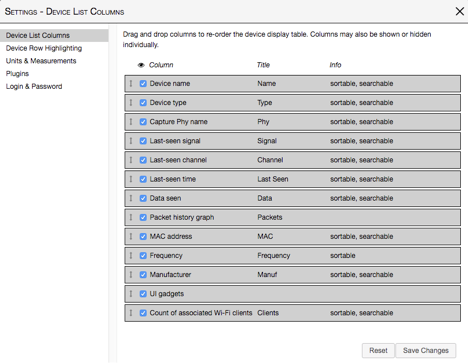

Click Save Changes

7 . Now repeat for this screen

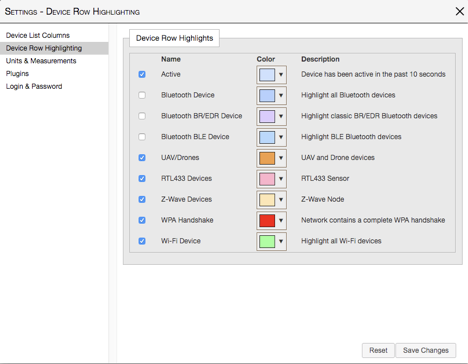

Click Save Changes


8 . With this changed, let's explore the UI a bit.  Pick one of the APs and click on it.

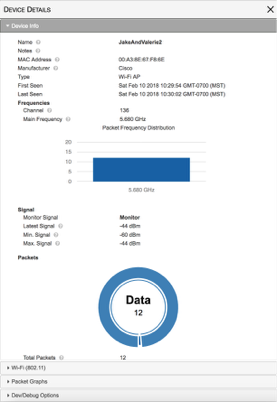

There are a number of expandable sections.  Check out the data from each of them.  You will note that it appears that today this version of kismet is only collecting data from.  Management and control are not shown.

The manuf file we moved into /etc/  is providing us the manufacturer data.

Clicking on the wifi you should see information about the SSID, security, beacon info, rates, and associated clients.
Under the Dev/Debug, there is a link to the raw JSON.





9 . Find your wireless MAC address, we're going to need it in the next exercise.  Search for it in Kismet and pull up the JSON data for it.  I would suggest Firefox because it natively makes JSON pretty for you.

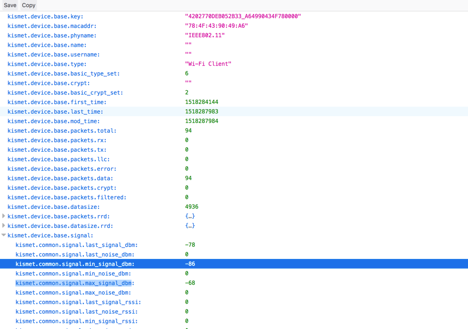



# NOW ONTO THE PYTHON!

In [ ]:
#Imports and define your mac
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as plt
import KismetRest as KR
import seaborn as sns
import json

#Set your wireless mac address here
my_mac = "xx:xx:xx:xx:xx:xx"

In [ ]:
#Create a connector to Kismet
kc = KR.KismetConnector("http://127.0.0.1:2501")
#kc.device_by_mac(my_mac)


In [ ]:
#Pull info for your mac from Kismet
my_info = kc.device_by_mac(my_mac)[0]


In [ ]:
print("Last Signal Heard: " + str(my_info["kismet.device.base.signal"]["kismet.common.signal.last_signal_dbm"]))
print("Minimum Signal Heard: " + str(my_info["kismet.device.base.signal"]["kismet.common.signal.min_signal_dbm"]))
print("Max Signal Heard: " + str(my_info["kismet.device.base.signal"]["kismet.common.signal.max_signal_dbm"]))


In [ ]:
cur_RSSI = []
min_RSSI = []
max_RSSI = []
all_devices = kc.device_list()
len(all_devices)
for device in all_devices:
    cur_RSSI.append(int(device["kismet.device.base.signal"]["kismet.common.signal.last_signal_dbm"]))
    max_RSSI.append(int(device["kismet.device.base.signal"]["kismet.common.signal.max_signal_dbm"]))
    min_RSSI.append(int(device["kismet.device.base.signal"]["kismet.common.signal.min_signal_dbm"]))
#    print("Last Signal Heard: " + str(device["kismet.device.base.signal"]["kismet.common.signal.last_signal_dbm"]))
#    print("Minimum Signal Heard: " + str(device["kismet.device.base.signal"]["kismet.common.signal.min_signal_dbm"]))
#    print("Max Signal Heard: " + str(device["kismet.device.base.signal"]["kismet.common.signal.max_signal_dbm"]))
min_plot = sns.distplot(min_RSSI, kde_kws={"color": "k", "lw": 3, "label": "min"})
cur_plot = sns.distplot(cur_RSSI, label="current", kde_kws={"color": "b", "lw": 3, "label": "current"})
max_plot = sns.distplot(max_RSSI, label="max", kde_kws={"color": "r", "lw": 3, "label": "max"})




#The exercise for this lab, take the code in the previous section and add in some conditionals
#so you can display the graph below for only APs, or Clients.